In [ ]:
#|default_exp app

In [6]:
#|export
from fastai.vision.all import *
import gradio as gr

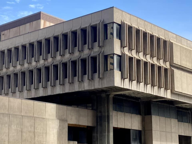

In [22]:
brutalism = PILImage.create('images/brutalism.jpg')
modernism = PILImage.create('images/modernism.jpg')

image = brutalism
image.thumbnail((192,192))
image

In [12]:
#|export
learn = load_learner('brutalism_or_modernism.pkl')

In [25]:
#|export
categories = ('brutalism', 'modernism')

def classify_image(image):
    pred, idx, probs = learn.predict(image)
    return dict(zip(categories, map(float, probs)))

classify_image(image)

{'brutalism': 0.8325099349021912, 'modernism': 0.16749009490013123}

In [27]:
#|export
image = gr.components.Image()
label = gr.components.Label()
examples = ['images/brutalism.jpg', 'images/modernism.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


In [29]:
import nbdev
nbdev.export.nb_export('gradio.ipynb', './')